In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [2]:
df = pd.read_csv("/content/winequality-red.csv", sep=";")
print("Shape:", df.shape)
print(df.head())


Shape: (1599, 1)
  fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0  7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0....                                                                                               
1  7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0....                                                                                               
2  7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0...                                                                                               
3  11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,...                                                                                               
4  7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0....                                                                                               


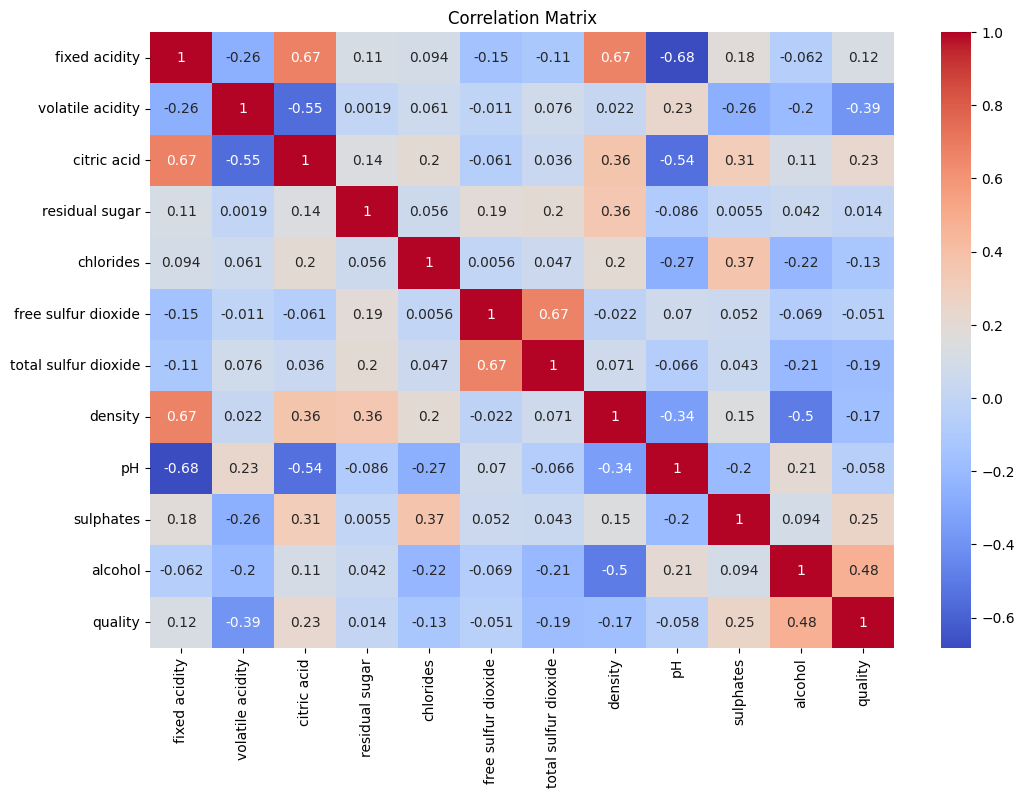

In [4]:
df = pd.read_csv("/content/winequality-red.csv", sep=",")
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

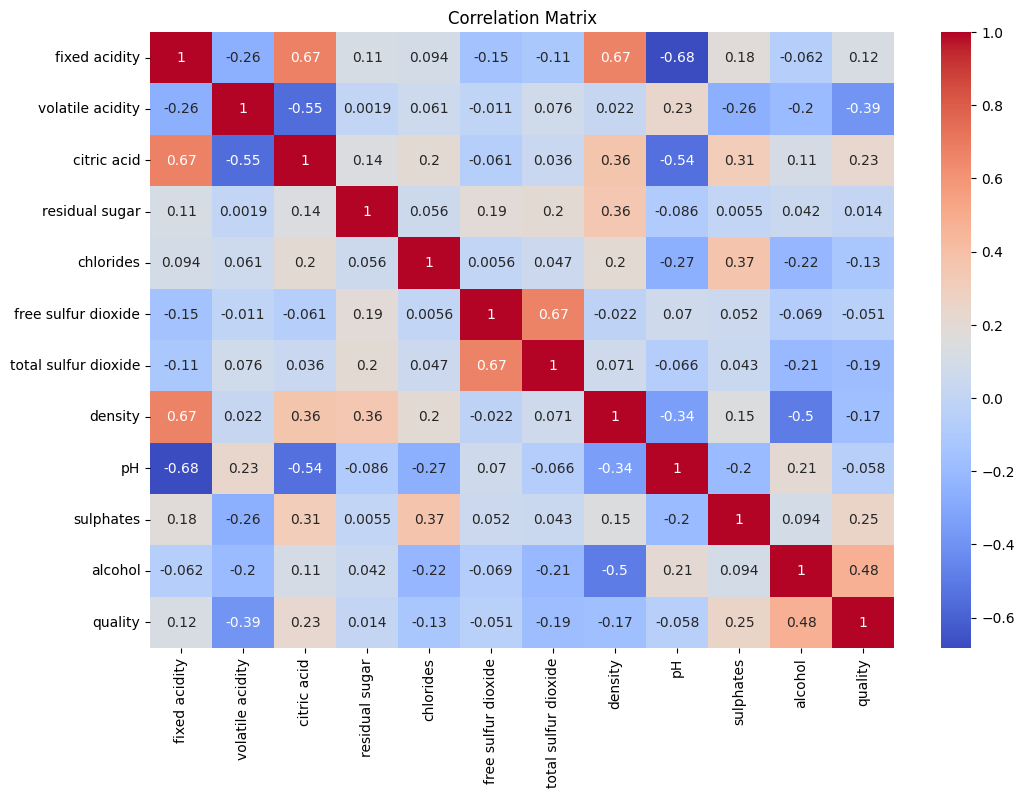

In [5]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [6]:
X = df.drop("quality", axis=1)
y = df["quality"]


In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [9]:
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=300, random_state=42)

In [10]:
pred_val_rf = rf.predict(X_val)
rmse_rf = np.sqrt(mean_squared_error(y_val, pred_val_rf))
r2_rf = r2_score(y_val, pred_val_rf)

print("Random Forest RMSE:", rmse_rf)
print("Random Forest R2:", r2_rf)


Random Forest RMSE: 0.5535718612389502
Random Forest R2: 0.5310802479282583


In [11]:
xgb = XGBRegressor(
    n_estimators=2000,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train_scaled, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=2000,
             n_jobs=None, num_parallel_tree=None, ...)

In [12]:
pred_val_xgb = xgb.predict(X_val_scaled)
rmse_xgb = np.sqrt(mean_squared_error(y_val, pred_val_xgb))
r2_xgb = r2_score(y_val, pred_val_xgb)

print("XGBoost RMSE:", rmse_xgb)
print("XGBoost R2:", r2_xgb)


XGBoost RMSE: 0.5752750982572832
XGBoost R2: 0.49359065294265747
